In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import cv2
import sc2

%pylab inline

sc2.utils.jit.enable()
sc2.utils.imageio.configurate("default_show_mode", "plt")

Populating the interactive namespace from numpy and matplotlib


/Users/destiny/Downloads/算分/Python-Seam-Carving/notebooks/sc2/warnings.py:13: SeamCarvingWarning: Searching for image in images folder
  warnings.warn(*args, **kwargs, category=SeamCarvingWarning)


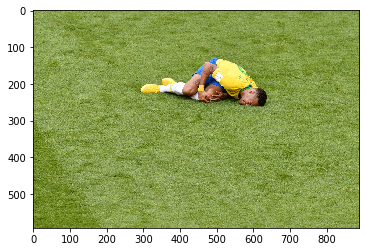

In [2]:
image = sc2.utils.image_load("football")
# scale the image
image = cv2.resize(image, dsize=None, fx=0.3, fy=0.3)
sc2.utils.image_show(image)

In [ ]:
saliency = sc2.advanced.static_saliency(image)
saliency = sc2.advanced.gaussian(saliency)
sc2.utils.image_show(saliency)

In [ ]:
backup = np.copy(image)

In [ ]:
# decide how many seams to remove
steps = int(image.shape[1] * 0.4)

# Conservative Seam Carving

In [ ]:
image = np.copy(backup)

# remove seams normally
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)

sc2.utils.image_show(image)

# Seam Carving with Saliency Map
![saliency](./src/saliency.png)
- **使用图片的颜色信息构建energy map**
- **将图像分为不同大小的块，以块的平均颜色作为背景颜色**
- **与背景色调差异较大的部分即为前景，具有较高的energy**
- **利用视觉对于低频成分的敏感特性**

In [ ]:
image = np.copy(backup)

# remove seams with saliency pretection
for i in tqdm.tqdm(range(steps)):
    saliency = sc2.advanced.static_saliency(image)
    energy = sc2.energy.laplacian(image)
    energy = sc2.utils.min_max_normalization(energy * saliency)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)

sc2.utils.image_show(image)

### Comparation：the football player is preserved better